In [10]:
import matplotlib.pyplot as plt

from csvreader import read_patient_csv
from comparison import compare_models

In [11]:
patientSet = read_patient_csv()
Adults = []
for patient in patientSet:
    if patient["age"] > 17:
        Adults.append(patient)

In [12]:
results = compare_models(Adults, "Marsh")

In [13]:
print(results["patient_level"][0])

{'patient': '1', 'results': {'MDPE': 0.8454222680966839, 'MDAPE': 0.8454222680966839, 'Wobble': 0.17816757300569736}}


In [14]:
patient_IDs = [d["patient"] for d in results["patient_level"]]
print(patient_IDs)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [31]:
from sklearn.utils import resample

resampled = resample(patient_IDs, n_samples=len(patient_IDs))
print(len(resampled))

523


In [33]:
sampled_median = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] in resampled]
print(len(sampled_median))

323


324


In [18]:
unsampled_median = [m["results"]["MDAPE"] for m in results["patient_level"]]

sampled_median = []

for i in resampled:
    j = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] == i]
    sampled_median.append(j)

In [19]:
import statistics

print(statistics.median(unsampled_median))
print(statistics.median(sampled_median)[0])

0.34693299752056883
0.33833626176335707


In [20]:
%%timeit

resampled = resample(patient_IDs, n_samples=len(patient_IDs))


128 µs ± 3.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%%timeit

for i in resampled:
        j = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] == i]

12.3 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
medians = []

for _ in range (1000):
    resampled = resample(patient_IDs, n_samples=len(patient_IDs), random_state=9)
    sampled_median = []

    for i in resampled:
        j = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] == i]
        sampled_median.append(j)
        
    medians.append(statistics.median(sampled_median)[0])
    
print(statistics.median(medians))

0.3500143751605008


In [24]:
medians = []

for _ in range (1000):
    resampled = resample(patient_IDs, n_samples=len(patient_IDs), random_state=9)
    sampled_median = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] in resampled]
        
    medians.append(statistics.median(sampled_median))

sampled_median = [m["results"]["MDAPE"] for m in results["patient_level"] if m["patient"] in resampled]

print(statistics.median(medians))

0.3516910628905451


In [ ]:
print(medians)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1000.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([-0.14830894, -0.12830894, -0.10830894, -0.08830894, -0.06830894,
        -0.04830894, -0.02830894, -0.00830894,  0.01169106,  0.03169106,
         0.05169106,  0.07169106,  0.09169106,  0.11169106,  0.13169106,
         0.15169106,  0.17169106,  0.19169106,  0.21169106,  0.23169106,
         0.25169106,  0.27169106,  0.29169106,  0.31169106,  0.33169106,
         0.35169106,  0.37169106,  0.39169106,  0.41169106,  0.43169106,
         0.45169106,  0.47169106,  0.49169106,  0.51169106,  0.53169106,
         0.55169106,  0.57169106,  0.59169106,  0.61169106,  0.63169106,
         0.65169

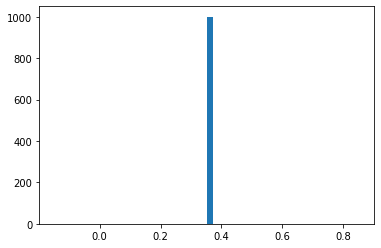

In [34]:
plt.hist(medians, 50)